Sentiment Analysis on IMDB Movie Reviews - Jennifer Medina

imports

In [1]:
!pip install scikit-plot

In [2]:
from typing import List, Set, Dict, Tuple, Optional, Text, Union
from operator import itemgetter

import numpy as np
import pandas as pda
import seaborn as sns
import sklearn.linear_model as sk
import scikitplot as skplt
import math
import scipy as sp
import scipy.stats

from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

from scipy.sparse import spmatrix
from scipy import stats
from scipy.stats import norm

from scikitplot import metrics

mount & use google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!cp -r gdrive/MyDrive/LING539FinalProject/ /content

**Baseline Model**

open & split training doc

In [5]:
doc = open('/content/LING539FinalProject/labeledTrainDataSubset.tsv')
count = 0
traininglist = []
idlist = []
sentimentlist = []
reviewlist = []
for line in doc:
    id = line.split("\t")[0]
    idlist.append(id)
    sentiment = line.split("\t")[1]
    sentimentlist.append(sentiment)
    review = line.split("\t")[2]
    reviewlist.append(review)
    istuple = [id, sentiment]
    traininglist.append(istuple)
    count += 1
idlist = idlist[1:]
sentimentlist = sentimentlist[1:]
reviewlist = reviewlist[1:]
print (count)
#print (idlist[0:3])
#print (sentimentlist)
#print (reviewlist[0:3])

8220


text to features

In [6]:
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df = 8, max_df = 10)
vectorizer.fit_transform(reviewlist)
#print(vectorizer)

<8219x10613 sparse matrix of type '<class 'numpy.int64'>'
	with 93893 stored elements in Compressed Sparse Row format>

features to matrix

In [7]:
features = vectorizer.transform(reviewlist).toarray()
print(features.shape)

(8219, 10613)


sentiment to labels

In [8]:
le = preprocessing.LabelEncoder()
le.fit(sentimentlist)


LabelEncoder()

class names (should be 0 for negative; 1 for positive)

In [9]:
list(le.classes_)


['0', '1']

In [10]:
labels = le.transform(sentimentlist)

logistic regression

In [11]:
logreg = LogisticRegression(fit_intercept=True,class_weight={0:0.5, 1:0.5},random_state=0)



Training

In [12]:
logreg.fit(features, labels)

LogisticRegression(class_weight={0: 0.5, 1: 0.5}, random_state=0)

accuracy

In [13]:
accuracy = logreg.score(features, labels)
print(accuracy*100,'% accurate')

97.9194549215233 % accurate


open and split test data

In [14]:
testdoc = open('/content/LING539FinalProject/testDataSubset.tsv')
testcount = 0
testtraininglist = []
testidlist = []
testsentimentlist = []
testreviewlist = []
for line in testdoc:
    testid = line.split("\t")[0]
    testidlist.append(testid)
    testsentiment = line.split("\t")[1]
    testsentimentlist.append(testsentiment)
    testreview = line.split("\t")[2]
    testreviewlist.append(testreview)
    testtuple = [testid, testsentiment]
    testtraininglist.append(testtuple)
    testcount += 1
testidlist = testidlist[1:]
testsentimentlist = testsentimentlist[1:]
testreviewlist = testreviewlist[1:]
print (testcount)
print (testidlist[0:3])
print (testsentimentlist[0:3])
print (testreviewlist[0:3])

2100
['"4323_4"', '"1936_10"', '"2434_4"']
['0', '1', '0']
['"European Vacation (aka National Lampoon\'s European Vacation) is the weakest of the Vacation films (the first and third one the most superior of the films). While Chevy Chase and Beverly D\'Angelo return as Clark and Ellen Griswold (with new actors in the roles of Russ and Audrey Griswold), this time they are given a weaker script with very bad dialogue. This causes the pacing to suffer, with the jokes not very funny at all. To be more specific, what really causes this film to suffer is the fact that the \\"jokes\\" as they are, are just pasted together into a cobbled-together script), rather than serving a central plot as the other 3 Vacation films have. Oh well, they can\'t win them all. 4 out of 10."\n', '"this independent film was one of the best films at the tall grass film festival that i have ever seen there i loved it there are so many things that was great about the film on top of all that the cast and crew that i h

vectorize labels

In [15]:
testlabels = le.transform(testsentimentlist)

In [16]:
testfeatures = vectorizer.transform(testreviewlist).toarray()
print(testfeatures.shape)

(2099, 10613)


prediction

In [17]:
testpredict = logreg.predict(testfeatures)
print(testpredict)

[0 1 0 ... 0 0 0]


confusion matrix

In [18]:
confusionmatrix = confusion_matrix(testlabels, testpredict)

In [19]:
trueneg, falsepos, falseneg, truepos = confusion_matrix(testlabels, testpredict).ravel()
print('True Positive(truepos) = ', truepos)
print('False Positive(falsepos) = ', falsepos)
print('True Negative(trueneg) =', trueneg)
print('False Negative(falseneg) =',falseneg)

True Positive(truepos) =  742
False Positive(falsepos) =  330
True Negative(trueneg) = 734
False Negative(falseneg) = 293


accuracy of confusion matrix

In [20]:
accuracy = (truepos+trueneg)/(truepos+falsepos+trueneg+falseneg)
print(accuracy*100,"% accurate")

70.31919961886612 % accurate


accuracy check/balance

In [21]:
testaccuracy = accuracy_score(testlabels,testpredict)
print(testaccuracy*100,"% accurate")

70.31919961886612 % accurate


confusion matrix graph

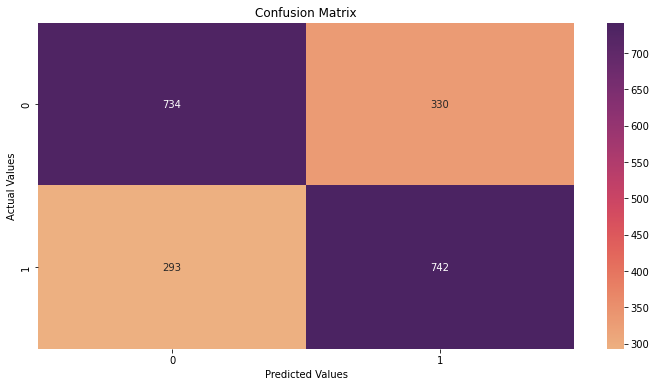

In [22]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='flare')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')


classification report

In [23]:
print(classification_report(testlabels, testpredict))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1064
           1       0.69      0.72      0.70      1035

    accuracy                           0.70      2099
   macro avg       0.70      0.70      0.70      2099
weighted avg       0.70      0.70      0.70      2099



**Fancy Model**

For this section, I followed a tutorial from https://colab.research.google.com/drive/1934Mm2cwSSfT5bvi78-AExAl-hSfxCbq#scrollTo=QUf0ghBJi6P9

install tensorflow libraries

In [25]:
!pip install -q transformers tensorflow_datasets

     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 73.6 MB/s 
     |████████████████████████████████| 596 kB 78.4 MB/s 
     |████████████████████████████████| 880 kB 59.9 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 96 kB 7.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.0 which is incompatible.


imports for fancy model

In [105]:
import os
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import metrics
from keras.callbacks import Callback
from scikitplot.metrics import plot_confusion_matrix, plot_roc

get gpu

In [106]:
gpu_name = tf.test.gpu_device_name()

print(gpu_name)


/device:GPU:0


load imdb dataset from TF dataset library

In [107]:
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews', 
          split = (tfds.Split.TRAIN, tfds.Split.TEST),
          as_supervised=True,
          with_info=True)

print('info', ds_info)

info tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning

examples for fine-tuning

In [108]:
for review, label in tfds.as_numpy(ds_train.take(5)):
    print('review', review.decode()[0:50], label)

review This was an absolutely terrible movie. Don't be lu 0
review I have been known to fall asleep during films, but 0
review Mann photographs the Alberta Rocky Mountains in a  0
review This is the kind of film for a snowy Sunday aftern 1
review As others have mentioned, all the women that go nu 1


tokenization

In [109]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [110]:
vocabulary = tokenizer.get_vocab()
print(list(vocabulary.keys())[5000:5020])

['knight', 'lap', 'survey', 'ma', '##ow', 'noise', 'billy', '##ium', 'shooting', 'guide', 'bedroom', 'priest', 'resistance', 'motor', 'homes', 'sounded', 'giant', '##mer', '150', 'scenes']


In [111]:
maxLengthTest = 20
testSentence = 'Test tokenization sentence 1. Testing tokenization sentence 2'
testSentenceSpecialTokens = '[CLS]' + testSentence + '[SEP]'
tokenized = tokenizer.tokenize(testSentenceSpecialTokens)
print('tokenized', tokenized)

tokenized ['[CLS]', 'test', 'token', '##ization', 'sentence', '1', '.', 'testing', 'token', '##ization', 'sentence', '2', '[SEP]']


In [259]:
input_ids = tokenizer.convert_tokens_to_ids(tokenized)
paddingLength = maxLengthTest - len(input_ids)
input_ids = input_ids + ([0] * paddingLength)
attention_mask = [1] * len(input_ids)
attention_mask = attention_mask + ([0] * paddingLength)
token_type_ids = [0] * maxLengthTest

In [113]:
bertInput = {
    'token IDs': input_ids,
    'token Type IDs': token_type_ids,
    'attention mask': attention_mask
}
print(bertInput)

{'token IDs': [101, 3231, 19204, 3989, 6251, 1015, 1012, 5604, 19204, 3989, 6251, 1016, 102, 0, 0, 0, 0, 0, 0, 0], 'token Type IDs': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]}


In [115]:
maxLength = 512
batchSize = 6

convert to feature, map & encode

In [116]:
def convert_example_to_feature(review):
  return tokenizer.encode_plus(review, 
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = maxLength, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )


In [117]:
def map_example_to_dict(input_ids, attentionMasks, tokenTypeIDs, label):
  return {
      "input IDs": input_ids,
      "token type IDs": token_type_ids,
      "attention mask": attention_mask,
  }, label


In [118]:
def encode_examples(ds, limit=-1):
  inputIDsList = []
  tokenTypeIDsList = []
  attentionMaskList = []
  labelList = []

  if (limit > 0):
      ds = ds.take(limit)
  for review, label in tfds.as_numpy(ds):
    bertInput = convert_example_to_feature(review.decode())
    inputIDsList.append(bertInput['input_ids'])
    tokenTypeIDsList.append(bertInput['token_type_ids'])
    attentionMaskList.append(bertInput['attention_mask'])
    labelList.append([label])
  return tf.data.Dataset.from_tensor_slices((inputIDsList, attentionMaskList, tokenTypeIDsList, labelList)).map(map_example_to_dict)


In [119]:
dsTrainEncoded = encode_examples(ds_train).shuffle(10000).batch(batchSize)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [120]:
dsTestEncoded = encode_examples(ds_test).batch(batchSize)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


parameters for model

In [122]:
learningRate = 2e-5
numberOfEpochs = 2

intialize & optimize model

In [131]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
optimizer = tf.keras.optimizers.Adam(learning_rate=learningRate, epsilon=1e-08)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


metrics

In [133]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

compile model

In [134]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

run model

In [ ]:
bert_history = model.fit(dsTrainEncoded, epochs=numberOfEpochs, validation_data=dsTestEncoded)

Epoch 1/2
4167/4167 [==============================] - 2603s 620ms/step - loss: 0.2382 - accuracy: 0.9058 - val_loss: 0.1904 - val_accuracy: 0.9298
Epoch 2/2
4167/4167 [==============================] - 2581s 620ms/step - loss: 0.1222 - accuracy: 0.9567 - val_loss: 0.1756 - val_accuracy: 0.9377


In [135]:
print(loss)

In [136]:
print(accuracy)

SparseCategoricalAccuracy(name=accuracy,dtype=float32)


calculate zscore:


In [261]:
numerator = (.9567 - .7032)
print(numerator)


0.25349999999999995


In [262]:
posValueScore = (1 - .7032)
print(posValueScore)

0.29679999999999995


In [263]:
posValScoreSq = posValueScore * posValueScore
print(posValScoreSq)

0.08809023999999997


In [264]:
negValueScore = (0 - .7032)
print(negValueScore)

-0.7032


In [265]:
negValScoreSq = negValueScore * negValueScore
print(negValScoreSq)

0.4944902400000001


In [266]:
sum1 = (posValScoreSq * truepos)
print(sum1)

65.36295807999998


In [267]:
sum2 = (negValScoreSq * trueneg)
print(sum2)

362.95583616000005


In [268]:
numeratorOfNumeratorOfDenominator = (sum1 + sum2)
print(numeratorOfNumeratorOfDenominator)

428.31879424000005


In [269]:
numberOfReviews = testcount
print(numberOfReviews)

2100


In [270]:
numeratorOfDenominator = math.sqrt(numeratorOfNumeratorOfDenominator/numberOfReviews)
print(numeratorOfDenominator)

0.4516207818407787


In [271]:
denominatorOfDenominator = math.sqrt(numberOfReviews)
print(denominatorOfDenominator)

45.8257569495584


In [272]:
denominator = (numeratorOfDenominator/denominatorOfDenominator)
print(denominator)

0.009855173420002411


In [273]:
zScore = (numerator/denominator)
print(zScore)

25.722530613767518


P-value calculation

In [274]:
pvalue = scipy.stats.norm.sf(abs(zScore))
print(pvalue)

3.271738393958879e-146


Error Analysis

In [25]:
listOfFalsePositives = []
listOfFalseNegatives = []
for index in range(len(testpredict)):
  if testpredict[index] == 0:
    if testlabels[index] == 1:
      listOfFalseNegatives.append((testsentimentlist[index], testidlist[index], testreviewlist[index]))
  elif testpredict[index] == 1:
    if testlabels[index] == 0:
      listOfFalsePositives.append((testsentimentlist[index], testidlist[index], testreviewlist[index]))

print("False Positive Reviews" + str(listOfFalsePositives))
print("False Negative Reviews" + str(listOfFalseNegatives))

False Positive Reviews[('0', '"1940_3"', '"the writing of the journalists and the required over eager reckless press officer and sobbing grandma was ham-fisted and cliché ridden.<br /><br />I cant blame the actors, but surely someone must have said \\"are you joking I cant say this!\\"<br /><br />This episode had a press perspective and police perspective, while the police perspective was standard enough, the press perspective and characterization was overdrawn exaggerated and at points insultingly unbelievable.<br /><br />I notice that this was an HBO co production, if so then perhaps the sledgehammer stereotypes can be explained in that light,<br /><br />I was completely cringing during the press conference scene. it lacked any credibility and did not remotely ring true. 40 minutes into the first episode and I am still waiting for the suspense.<br /><br />Skip Five Daysthis. the 2008/9 production with these characters is far better and more suspenseful even if the crime is over the t